## Import libraries 

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv('Data/home_data.csv')
# df.head()

In [79]:
# evaluate the data set size
df.shape

(21613, 21)

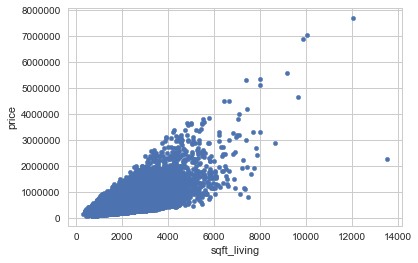

In [80]:
# Plot the two variables against eachother
df.plot(x='sqft_living', y='price', kind='scatter')

In [110]:
# filter houses located in given locations 
location = df.loc[(df['zipcode'] > 98180) & (df['zipcode'] < 98198)]
# location = df.loc[(df['zipcode'] > 98039)]
location

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
11,9212900260,20140527T000000,468000,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
13,6054650070,20141007T000000,400000,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
14,1175000570,20150312T000000,530000,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


In [117]:
location.shape
# location['price'].mean()
# df.boxplot(x = zipcode, y = price)

(14654, 21)

In [83]:
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']
# sns.pairplot(df[cols], size = 2.5)
# plt.show()

In [84]:
# calculate the mean value of given houses 
print (location['price'].mean())

289078.345588


In [85]:
# filter houses houses with living area > 2000 and <= 4000
sqft_living = df.loc[(df['sqft_living'] >= 2000) & (df['sqft_living'] <= 4000)]
sqft_living.shape[0]

9221

In [86]:
# calculate fraction of houses with living area > 2000 and <= 4000
fraction = sqft_living.shape[0] * 100 / df.shape[0]
fraction

42

## Regression Models
 - Model 1 - Simple complexity model 
 - Model 2 - Medium complexity model
 - Model 3 - Advanced complexity model

### Simple complexity model

In [87]:
simple_feature = ['sqft_living']

# create a subset of the dataframe 
X_simple = df[simple_feature]
y_simple = df['price']

In [88]:
# split training and test data 
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size = 0.3, random_state = 0)

In [89]:
# Create an object that is an ols regression
lr_simple_model = LinearRegression()

In [90]:
lr_simple_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# Apply the model we created using the training data
# to the test data, and calculate the RSS.
RSS_simple = ((y_test - lr_simple_model.predict(X_test)) **2).sum()
RSS_simple

454982360978510.4

### Medium complexity model

In [92]:
medium_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
# create a subset of the dataframe 
X_medium = df[medium_features]
y_medium = df['price']

In [93]:
# split training and test data 
X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size = 0.3, random_state = 0)

In [94]:
# scale all features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X_train)

In [95]:
# Create an object that is an ols regression
lr_medium_model = LinearRegression()

In [96]:
lr_medium_model.fit(X_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# Apply the model we created using the training data
# to the test data, and calculate the RSS.
# RSS_medium = ((y_test - lr_medium_model.predict(X_test)) **2).sum()

RSME_medium = np.mean((lr_medium_model.predict(X_test) - y_test) ** 2)
print("Mean squared error: %.2f"
      % np.mean((lr_medium_model.predict(X_test) - y_test) ** 2))

Mean squared error: 14669056535873202176.00


### Advanced complexity model

In [98]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
                     'condition',     # condition of house 
                     'grade',         # measure of quality of construction 
                     'waterfront',    # waterfront property 
                     'view',          # type of view 
                     'sqft_above',    # square feet above ground 
                     'sqft_basement', # square feet in basement 
                     'yr_built',      # the year built 
                     'yr_renovated',  # the year renovated 
                     'lat', 'long',   # the lat-long of the parcel 
                     'sqft_living15', # average sq.ft. of 15 nearest neighbors 
                     'sqft_lot15',    # average lot size of 15 nearest neighbors 
]

In [99]:
# create a subset of the dataframe 
X_advanced = df[advanced_features]
y_advanced = df['price']

In [100]:
# split training and test data 
X_train, X_test, y_train, y_test = train_test_split(X_advanced, y_advanced, test_size = 0.3, random_state = 0)

In [101]:
# X_train.head()

In [102]:
# y_train.head()

In [103]:
# scale all features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X_train)

In [104]:
# Create an object that is an ols regression
lr_advanced_model = LinearRegression()

In [105]:
lr_advanced_model.fit(X_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
# Apply the model we created using the training data
# to the test data, and calculate the RSS.
RSS_advanced = ((lr_advanced_model.predict(X_test) - y_test) **2).sum()
print("Residual sum of squares: %.2f" % RSS_advanced)

Residual sum of squares: 43471777710481663328256.00


In [107]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr_advanced_model.predict(X_test), multioutput='raw_values')

array([  6.70446911e+18])

In [108]:
RSME_advanced = np.mean((lr_advanced_model.predict(X_test) - y_test) ** 2)
print("Mean squared error: %.2f"
      % np.mean((lr_advanced_model.predict(X_test) - y_test) ** 2))

Mean squared error: 6704469110191496192.00


In [109]:
RSME_advanced - RSME_medium

-7.964587425681706e+18